# Comparing central tendency of two groups

1. Brief intro using Normal distributions
2. Introducing 2 data sets
   - UCLA salary: heavily skewed data
   - Carbon Dioxide rates in chilled and not-chilled plants: less skewed
   - Assessment of normal assumptions
3. Standard Statistics
   - Student 
   - Welch t-test
   - Nonparametric Mann-Whitney-Wilcoxon test
4. Bootstrap statistics
   - Big-Box (student-like)
   - Two-Box (whelch-like)
   - Rank (mww-like)
   - Confidence intervals approach
5. Effect Size

---

## 1. Introduction

Testing the difference between two means is one of the most common tasks for statistical inference. Using Gaussian curves, let's demonstrate the underlying principals for the following sections.

In [4]:
#initialize workspace
%run _init.py
#config matplotlib to not use dynamic figures
%matplotlib inline
#config matplotlib backend to generate low weight pngs
%config InlineBackend.figure_format = 'png'

In [5]:
# Local Functions
def normalOverlap(x,d1Opts = {"loc":0, "scale":1},d2Opts = {"loc":0, "scale":1}):
    return np.minimum(stats.norm.pdf(x,**d1Opts), stats.norm.pdf(x,**d2Opts));
def normalCombination(x,d1Opts = {"loc":0, "scale":1},d2Opts = {"loc":0, "scale":1}):
    return np.maximum(stats.norm.pdf(x,**d1Opts), stats.norm.pdf(x,**d2Opts));

In [3]:
#create gaussian data
N = 10000
X = np.random.uniform(low=-3, high=3.5,size=N);
xs = np.linspace(-3.1,3.6,600)
Ysamp1 = np.random.uniform(low=0, high= 0.41, size=N)
Ysamp2 = np.random.uniform(low=0, high= 0.41, size=N)

d1Params = dict(loc=0,scale=1);
d2Params = dict(loc=0.5,scale=1);

D1 = {
    'x': X[Ysamp1 <= stats.norm.pdf(X,**d1Params)],
    'y': Ysamp1[Ysamp1 <= stats.norm.pdf(X,**d1Params)]
};
D2 = {
    'x': X[Ysamp2 <= stats.norm.pdf(X,**d2Params)],
    'y': Ysamp2[Ysamp2 <= stats.norm.pdf(X,**d2Params)]
};
OVLP = {
    'x': X[Ysamp1 <= normalOverlap(X,d1Params,d2Params)],
    'y': Ysamp1[Ysamp1 <= normalOverlap(X,d1Params,d2Params)]
};
SET = {
    'x': X[Ysamp1 <= normalCombination(X,d1Params,d2Params)],
    'y': Ysamp1[Ysamp1 <= normalCombination(X,d1Params,d2Params)]
};

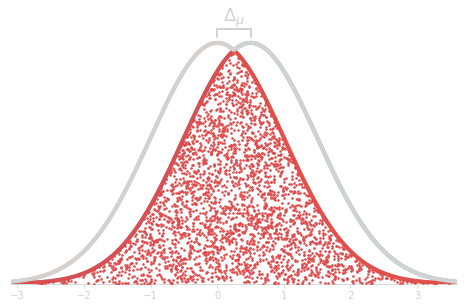

In [4]:
# Opener plot with 2 gaussians
fig = pyp.figure(figsize=(8,5))
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=11,concatOriginal=True,concatFirst=True);

# Plot the group1 axs[5:7]
axs[1].plot(xs, stats.norm.pdf(xs,**d1Params), color = col['orange'], lw = 4, alpha = 0.75);

# Plot group2
axs[2].plot(xs, stats.norm.pdf(xs,**d2Params), color = col['satBlue'], lw = 4, alpha = 0.75)

# plot cohens d
axs[3].annotate(
    '',
    xy = (0.5,0.405),
    xytext = (0,0.405),
    color = col['grey'],
    size = 14,
    ha = 'left',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': '-',
        'edgecolor': col['grey'],
        'facecolor': col['grey'],
        'connectionstyle': 'bar,fraction=-0.3',
        'lw': 2
    }
);
axs[3].text(0.25,0.42,r'$\Delta_{\mu}$', color=col['grey'], size=18,ha='center',va='bottom');

# Plot the merge only a[1:3]
axs[4].plot(xs, normalOverlap(xs,d1Params,d2Params), color = col['red'], lw = 4, alpha = 0.95)
axs[5].scatter(**OVLP,color = col['red'], marker='.',s=10,alpha = 0.95);

# plot the total set
axs[6].plot(xs, normalCombination(xs,d1Params,d2Params), color = col['grey'], lw = 4)

## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim((0,0.45));
    ax.set_xlim((-3.1,3.6));
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);

fig.savefig('../img/lecture7opener.svg', transparent=True);

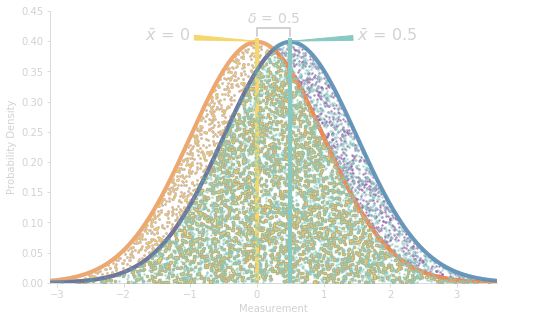

In [5]:
#Plot
fig = pyp.figure(figsize=(8,5))
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=11,concatOriginal=True,concatFirst=True);

# axs[0] => the axes only
axs[0].set_xlabel("Measurement");
axs[0].set_ylabel("Probability Density");

# Plot the group1 axs[5:7]
axs[5].scatter(**D1,marker='.', s = 10, color = col['yellow'],alpha=0.5);
axs[6].plot(xs, stats.norm.pdf(xs,**d1Params), color = col['orange'], lw = 4, alpha = 0.75);
axs[7].vlines(0, 0, 0.405,color=col['yellow'], lw=4);
axs[7].annotate(
    r'$\bar{x}\, =\, 0$',
    xy= (0,0.4),
    xytext = (-1,0.4),
    size = 16,
    color = col['grey'],
    ha='right',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['yellow'],
        'facecolor': col['yellow'],
        
    }
);

# Plot group2
axs[8].scatter(**D2,marker='.', s = 10, color = col['blue'],alpha=0.5);
axs[9].plot(xs, stats.norm.pdf(xs,**d2Params), color = col['satBlue'], lw = 4, alpha = 0.75)
axs[10].vlines(0.5, 0,0.405,color=col['blue'], lw=4);
axs[10].annotate(
    r'$\bar{x}\, =\, 0.5$',
    xy= (0.5,0.4),
    xytext = (1.5,0.4),
    size = 16,
    color = col['grey'],
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['blue'],
        'facecolor': col['blue'],
        
    }
);

# plot cohens d
axs[11].annotate(
    '',
    xy = (0.5,0.405),
    xytext = (0,0.405),
    color = col['grey'],
    size = 14,
    ha = 'left',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': '-',
        'edgecolor': col['grey'],
        'facecolor': col['grey'],
        'connectionstyle': 'bar,fraction=-0.3',
        'lw': 2
    }
);
axs[11].text(0.25,0.43,r'$\delta\, = \, 0.5$', color=col['grey'], size=14,ha='center');

# Plot the merge only a[1:3]
axs[1].scatter(**OVLP,marker='.', s = 30, color = col['green'],alpha=0.5);
axs[2].plot(xs, normalOverlap(xs,d1Params,d2Params), color = col['red'], lw = 4, alpha = 0.95)

# plot the total set
axs[3].scatter(**SET,marker='.', s = 10, color = col['purple'],alpha=0.6);
axs[4].plot(xs, normalCombination(xs,d1Params,d2Params), color = col['grey'], lw = 4)

## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim((0,0.45));
    ax.set_xlim((-3.1,3.6));

fig.savefig('../img/cohenD.svg', transparent=True)

## 2. Skewed and Assymetric Data

The important thing to consider when running two group tests is the precise nature of the Null Hypothesis. Considering the theoretical approach, we need to understand how the data are being handled in order to construct the Null Distribution. Then, and only then, can statistical inference make some real world sense. Even though the Null Hypothesis may not provide us a means to understand the biological impact of our results, it can add weight to biological interpretation.

Let's explore.

### 2.1 UCLA Salaries (2014)

In [11]:
#d1, [123942 169083 323792  22083  41249  64931  55466  56451 144312 102898] 110420.7 88786.227403
#d2,[ 59259  35450  59198  25502 101991  21861  38046 144860  50278  58872] 59531.7 37695.6061779
#uclaSalaries = pd.read_csv('data/UCLASalaries.csv');

samp1 = np.array([123942, 169083, 323792,  22083,  41249,  64931,  55466,  56451, 144312, 102898]);
samp2 = np.array([ 59259,  35450,  59198,  25502, 101991,  21861,  38046, 144860,  50278,  58872]);
m1 = np.median(samp1);
m2 = np.median(samp2);

#bootstrap
Na = len(samp1);
Nb = len(samp2);
D_actual = m1 - m2;
Xab = np.concatenate([samp1,samp2]);
B=10000;
D_boots = np.zeros(B);
D_bootsR = np.zeros(B);
for s in range(B):
    X1sim = np.random.choice(Xab, size=Na, replace=False);
    X2sim = np.random.choice(Xab, size=Nb, replace=False);
    X1simR = np.random.choice(Xab, size=Na, replace=True);
    X2simR = np.random.choice(Xab, size=Nb, replace=True);
    D_boots[s] = np.median(X1sim) - np.median(X2sim);
    D_bootsR[s] = np.median(X1simR) - np.median(X2simR);
p1 = (np.sum(D_boots >= D_actual) + np.sum(D_boots <= -D_actual))/B;
pR = (np.sum(D_bootsR >= D_actual) + np.sum(D_bootsR <= -D_actual))/B;

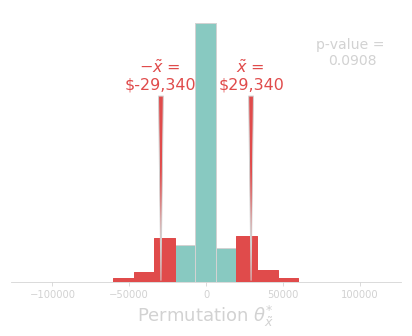

In [12]:
## Plots
fig = pyp.figure(figsize=(7,5))
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=2,concatOriginal=True,concatFirst=True);

# The histogram
axs[0].hist(D_boots, bins=11, color = col['blue'], edgecolor=col['grey'],zorder=0);
axs[0].set_xlabel(r'Permutation $\theta^{*}_{\tilde{x}}$', size = 18)

# Bins greater than actual
N,bins,pats = axs[1].hist(D_boots, bins=11, color = col['red'], edgecolor=col['red'],zorder=5);

binwidth = np.mean(np.diff(bins))
upperBins = bins[1:]+binwidth/2 >= D_actual;
lowerBins = bins[:-1]-binwidth/2 <= -D_actual;

for lgc,ptch in zip(upperBins + lowerBins,pats):
    if ~lgc:
        ptch.remove()

# The actual
axs[2].annotate(
    r'$\tilde{x}$' + f' = \n\${D_actual:,.0f}',
    xy = (D_actual,0),
    xytext = (D_actual,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=16,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[2].annotate(
    r'$-\tilde{x}$' + f' = \n\${-D_actual:,.0f}',
    xy = (-D_actual,0),
    xytext = (-D_actual,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=16,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
axs[1].text(
    127148*0.75,axs[0].get_ylim()[1]*0.9,
    f'p-value = \n{p1:0.4f}',
    ha = 'center',
    va = 'top',
    size = 14
);

## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim(axs[1].get_ylim());
    ax.set_xlim((-127148,127148))
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);

fig.savefig('../img/UCLAperms.svg', transparent=True);

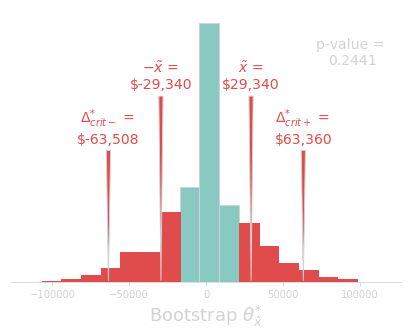

In [14]:
## Plots BOOTSTRAP
bSort = np.sort(D_bootsR)
bcrit = [bSort[250],bSort[9750]];
fig = pyp.figure(figsize=(7,5))
axs = fig.subplots();
axs = utils.multiX(ax=axs,n=3,concatOriginal=True,concatFirst=True);

# The histogram
axs[0].hist(D_bootsR, bins=19, color = col['blue'], edgecolor=col['grey'],zorder=0);
axs[0].set_xlabel(r'Bootstrap $\theta^{*}_{\tilde{x}}$', size = 18)

# Bins greater than actual
N,bins,pats = axs[1].hist(D_bootsR, bins=19,color = col['red'], edgecolor=col['red'],zorder=5);

binwidth = np.mean(np.diff(bins))
upperBins = bins[1:]+binwidth/2 >= D_actual;
lowerBins = bins[:-1]-binwidth/2 <= -D_actual;

for lgc,ptch in zip(upperBins + lowerBins,pats):
    if ~lgc:
        ptch.remove()

# The actual
axs[2].annotate(
    r'$\tilde{x}$' + f' = \n\${D_actual:,.0f}',
    xy = (D_actual,0),
    xytext = (D_actual,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[2].annotate(
    r'$-\tilde{x}$' + f' = \n\${-D_actual:,.0f}',
    xy = (-D_actual,0),
    xytext = (-D_actual,axs[1].get_ylim()[1]*0.7),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
axs[1].text(
    127148*0.75,axs[0].get_ylim()[1]*0.9,
    f'p-value = \n{pR:0.4f}',
    ha = 'center',
    va = 'top',
    size = 14
);

## crit
axs[3].annotate(
    r'$\Delta_{crit-}^{*}$' + f' = \n\${bcrit[0]:,.0f}',
    xy = (bcrit[0],0),
    xytext = (bcrit[0],axs[1].get_ylim()[1]*0.5),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red'],
        
    },
    zorder=100
);
axs[3].annotate(
    r'$\Delta_{crit+}^{*}$' + f' = \n\${bcrit[1]:,.0f}',
    xy = (bcrit[1],0),
    xytext = (bcrit[1],axs[1].get_ylim()[1]*0.5),
    color = col['red'],
    size=14,
    ha = 'center',
    va = 'bottom',
    arrowprops= {
        'arrowstyle': 'wedge',
        'edgecolor': col['grey'],
        'facecolor': col['red']
    },
    zorder=100
);
## format axes:
for ax in axs:
    if ax is not axs[0]:
        ax.axis('off');
    ax.set_ylim(axs[0].get_ylim());
    ax.set_xlim((-127148,127148));
    ax.spines['left'].set_visible(False);
    ax.set_yticks([]);

fig.savefig('../img/UCLAboots.svg', transparent=True);

In [14]:
p1 = (np.sum(D_boots >= D_actual) + np.sum(D_boots <= -D_actual))/B;
pR = (np.sum(D_bootsR >= D_actual) + np.sum(D_bootsR <= -D_actual))/B;
print(f'perm = {p1:0.2f}', f'rand = {pR:0.2f}')

perm = 0.09 rand = 0.25


In [29]:
### TESTING
